In [ ]:
from scipy import integrate
import numpy as np

# lorenz eq params:
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

def run_lorenz(r0 = (1, 1, 1), max_time = 20):
  """ solves the Lorenz ivp using r0 as the initial starting point over max_time / 0.01 time steps.
  """
  def f(t, r):
    x, y, z = r # unpack r
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return dx, dy, dz # tuple

  # https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
  sol = integrate.solve_ivp(f, (0, max_time), r0, max_step = 0.001, rtol=1e-10, atol=1e-10)
  return sol.y

def get_fixed_points():
  # http://web.math.ucsb.edu/~jhateley/paper/lorenz.pdf
  return [
          (0, 0, 0),
          (np.sqrt(beta * (rho - 1)), np.sqrt(beta * (rho - 1)), rho - 1),
          (-np.sqrt(beta * (rho - 1)), -np.sqrt(beta * (rho - 1)), rho - 1),
  ]

# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

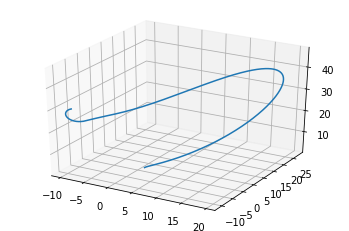

In [ ]:
(x, y, z) = run_lorenz((1, 1, 1), 100)
last_point = tuple(a[-1] for a in (x, y, z))
fixed_points = get_fixed_points()

# we've ran the lorenz system for t=100 steps, so we can assume last_point is near the attractor
# let's perturb last_point by permutations of (1, 0, 0)

perturbed_point = (last_point[0] + 1e-10, last_point[1], last_point[2])

orig_traj = run_lorenz(last_point, 100)
perturbed_traj = run_lorenz(perturbed_point, 100)

#norm = np.vectorize(lambda x : np.linalg.norm(x))
#print(norm(orig_traj - perturbed_traj))
#dist = np.linalg.norm(orig_traj - perturbed_traj, axis=1)

# from mpl_toolkits import mplot3d
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(x[:1000], y[:1000], z[:1000])
# ax.plot(tuple(a[0] for a in fixed_points), tuple(a[1] for a in fixed_points), tuple(a[2] for a in fixed_points), marker = 'o', linewidth=0)
# ax.plot([last_point[0]], [last_point[1]], [last_point[2]], marker = 'o', linewidth=0)

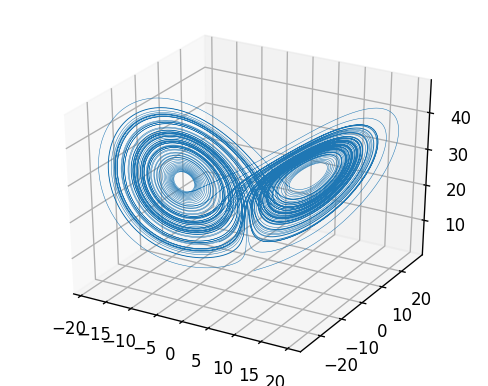

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 4), dpi=120)
ax = plt.axes(projection='3d')
ax.plot(x, y, z, linewidth=0.3)

Text(0.5, 0, 'Time (arb units)')

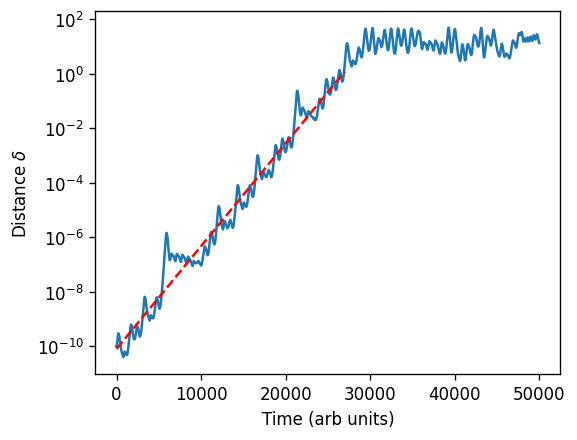

In [ ]:
# calculate the norms between the original point and the original + (1, 0, 0)
diff = orig_traj - perturbed_traj
distances = (list(np.linalg.norm(tuple(a[i] for a in diff)) for i in range(50000)))

x = range(27000)
y = np.log(distances[:27000])
coef = np.polyfit(range(27000), y, 1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 4), dpi=120)
plt.plot(distances)
plt.plot(x, np.exp(poly1d_fn(x)), '--r') #'--k'=black dashed line, 'yo' = yellow circle marker
plt.yscale('log')
plt.ylabel('Distance $\delta$')
plt.xlabel('Time (arb units)')

In [ ]:
distances[:10]

[1.000000082740371e-10,
 9.903010436076315e-11,
 9.811969873829352e-11,
 9.726872888323245e-11,
 9.647627097508279e-11,
 9.574166549664766e-11,
 9.506429979448934e-11,
 9.444398694856416e-11,
 9.387951800943787e-11,
 9.337048799900988e-11]